## Redes Neuronales aplicadas a texto

In [1]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS con toticias de 46 temas distintos.
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000 # cogemos las 10 000 palabras más repetidas del diccionario, para no petar la red neuronal.
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

2113536/2110848 [==============================] - 1s 1us/step
(8982,)
(8982,)
(2246,)
(2246,)


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decoded = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in training_data[8888]] # i - 3 es por especificaciones del dataset
)
decoded

557056/550378 [==============================] - 0s 1us/step


'? lt ? ? corp ltd said it received proposals to acquire the company following its announcement last august that it had retained investment dealers to solicit offers for all outstanding common shares ? ? said the offers are subject to clarification and negotiation and offered no further details reuter 3'

In [4]:
training_data[8888]

[1,
 56,
 2,
 2,
 81,
 149,
 8,
 16,
 638,
 795,
 6,
 438,
 4,
 49,
 480,
 25,
 1020,
 54,
 748,
 24,
 16,
 64,
 2503,
 205,
 368,
 6,
 8987,
 988,
 13,
 137,
 335,
 175,
 79,
 2,
 2,
 8,
 4,
 988,
 55,
 527,
 6,
 7336,
 9,
 4337,
 9,
 607,
 129,
 226,
 783,
 17,
 12]

In [15]:
import numpy as np

def one_hot_encode(data):
    encoded = np.zeros((len(data), WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, las marca con un 1 (leer numpy broadcasting)
    return encoded

In [16]:
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [17]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_labels) # es un one_hot_encoder al uso
y_test = to_categorical(testing_labels)

In [19]:
training_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(WORD_LIMIT,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax')) # reparto de probabilidad entre num_clases (hay 46 clases)

In [26]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [28]:
H = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
#con el validation split dividimos training data en training y validation en el propio fit()

Epoch 1/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0735 - accuracy: 0.9621 - val_loss: 1.2124 - val_accuracy: 0.7974
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.0690 - accuracy: 0.9644 - val_loss: 1.2940 - val_accuracy: 0.7869
Epoch 3/20
225/225 [==============================] - 1s 7ms/step - loss: 0.0704 - accuracy: 0.9620 - val_loss: 1.3368 - val_accuracy: 0.7941
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0691 - accuracy: 0.9631 - val_loss: 1.3087 - val_accuracy: 0.7969
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0687 - accuracy: 0.9602 - val_loss: 1.2615 - val_accuracy: 0.8008
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9634 - val_loss: 1.3733 - val_accuracy: 0.7963
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0625 - accuracy: 0.9635 - val_loss: 1.3854 - val_accuracy: 0.7874
Epoch 

Podemos ver que val_loss no sigue a la línea roja, por lo que tenemos overfitting

In [29]:
loss, accuracy = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.8777 - accuracy: 0.7778


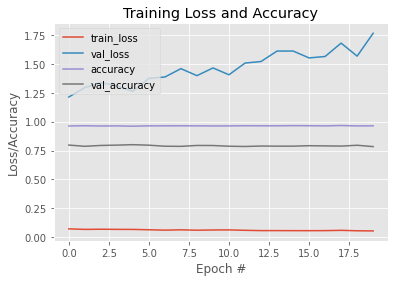

In [32]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Salta a la vista que hay overfitting.
Vamos a regularizar los pesos para intentar paliarlo.

## Regularización de Pesos

In [37]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 0.01 son los pesos maximos de la capa
model.add(Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [35]:
H = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 10ms/step - loss: 2.4167 - accuracy: 0.6331 - val_loss: 1.8141 - val_accuracy: 0.7206
Epoch 2/20
225/225 [==============================] - 2s 9ms/step - loss: 1.7035 - accuracy: 0.7347 - val_loss: 1.6990 - val_accuracy: 0.7290
Epoch 3/20
225/225 [==============================] - 2s 9ms/step - loss: 1.6022 - accuracy: 0.7563 - val_loss: 1.6412 - val_accuracy: 0.7468
Epoch 4/20
225/225 [==============================] - 2s 9ms/step - loss: 1.5494 - accuracy: 0.7620 - val_loss: 1.6211 - val_accuracy: 0.7551
Epoch 5/20
225/225 [==============================] - 2s 9ms/step - loss: 1.5018 - accuracy: 0.7758 - val_loss: 1.5712 - val_accuracy: 0.7507
Epoch 6/20
225/225 [==============================] - 2s 9ms/step - loss: 1.4717 - accuracy: 0.7830 - val_loss: 1.5627 - val_accuracy: 0.7629
Epoch 7/20
225/225 [==============================] - 2s 9ms/step - loss: 1.4478 - accuracy: 0.7852 - val_loss: 1.5649 - val_accuracy: 0.7607
Epoch

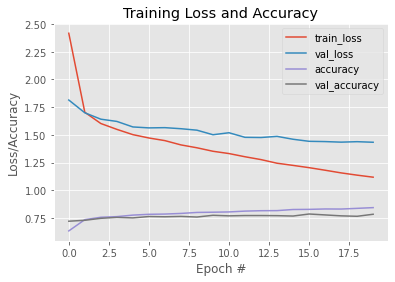

In [36]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Mejora un poco la generalización, pero baja un poco la precisión, vamos a probar de otra forma

## Dropout

In [39]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(WORD_LIMIT,)))
model.add(Dropout(0.75)) # desconecto el 75% de las neuronas
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.75))
model.add(Dense(46, activation='softmax'))

In [41]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
H = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 7ms/step - loss: 1.0487 - accuracy: 0.7279 - val_loss: 1.4821 - val_accuracy: 0.7574
Epoch 2/20
225/225 [==============================] - 1s 7ms/step - loss: 1.0369 - accuracy: 0.7296 - val_loss: 1.5251 - val_accuracy: 0.7524
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 1.0431 - accuracy: 0.7272 - val_loss: 1.5878 - val_accuracy: 0.7596
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 1.0358 - accuracy: 0.7326 - val_loss: 1.5836 - val_accuracy: 0.7613
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 1.0388 - accuracy: 0.7332 - val_loss: 1.6041 - val_accuracy: 0.7557
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.9894 - accuracy: 0.7385 - val_loss: 1.5868 - val_accuracy: 0.7646
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 0.9832 - accuracy: 0.7452 - val_loss: 1.6364 - val_accuracy: 0.7613
Epoch 

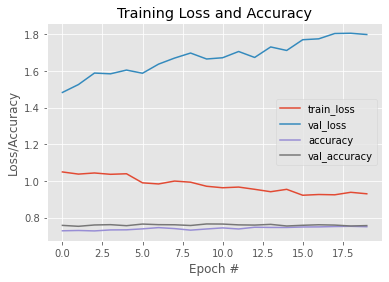

In [42]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Nos hemos pasado, esto es bastante peor.
vamos a intentar combinarlo con el batch normalization.

## Batch Normalization

In [43]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(WORD_LIMIT,)))
model.add(BatchNormalization())
model.add(Dropout(0.75)) # desconecto el 75% de las neuronas
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.75))
model.add(Dense(46, activation='softmax'))

In [44]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
H = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 3.4674 - accuracy: 0.3079 - val_loss: 1.9110 - val_accuracy: 0.6555
Epoch 2/20
225/225 [==============================] - 1s 6ms/step - loss: 2.1554 - accuracy: 0.5535 - val_loss: 1.4422 - val_accuracy: 0.7001
Epoch 3/20
225/225 [==============================] - 1s 7ms/step - loss: 1.8060 - accuracy: 0.6067 - val_loss: 1.3393 - val_accuracy: 0.7106
Epoch 4/20
225/225 [==============================] - 2s 7ms/step - loss: 1.6419 - accuracy: 0.6383 - val_loss: 1.2944 - val_accuracy: 0.7095
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 1.5093 - accuracy: 0.6579 - val_loss: 1.2424 - val_accuracy: 0.7206
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 1.4495 - accuracy: 0.6696 - val_loss: 1.2029 - val_accuracy: 0.7251
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 1.3826 - accuracy: 0.6786 - val_loss: 1.1692 - val_accuracy: 0.7273
Epoch 

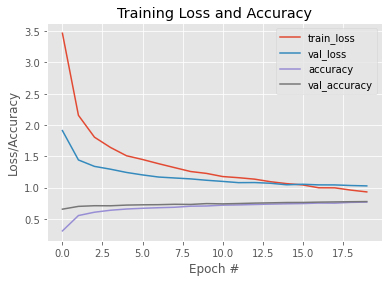

In [45]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0491 - accuracy: 0.7631


Ahora la línea azul sigue más a la roja, lo cual es buena señal.